# <center> What is a Feature ? <br><br> Research Question: On the Repository Level, What Labels are Used in Conjunction with "Feature Labels" ?</center>

### Glossary

<b>Feature Label</b>: a label that contains the word "feature". <br>
<b>Feature Issue</b>: an issue that has at least one <b>feature label</b>. <br>
<b>Feature Issue Dataset</b>: a dataset containing a number of <b>feature issues</b>. Each feature issue is associated with the repository it comes from through the "repository name" column.

### Importing Required Libraries

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Appropriate DataSet

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

#pd.reset_option('max_columns')
pd.reset_option('max_colwidth')
pd.reset_option('max_rows')

df = pd.read_csv('../../dataset/repositories/filtered/filtered_feature_label_dataset.csv')

# Converting strings to actual python lists
df['labels'] = df['labels'].apply(ast.literal_eval)
df['feature_labels'] = df['feature_labels'].apply(ast.literal_eval)
df['topics'] = df['topics'].apply(ast.literal_eval)

print('Full Shape:', df.shape)
df.head(2)

Full Shape: (7899, 34)


,id,name,isFork,commits,branches,defaultBranch,releases,contributors,license,watchers,stargazers,forks,size,createdAt,pushedAt,updatedAt,homepage,mainLanguage,totalIssues,openIssues,totalPullRequests,openPullRequests,blankLines,codeLines,commentLines,metrics,lastCommit,lastCommitSHA,hasWiki,isArchived,languages,labels,topics,feature_labels
0,3258141,alibaba/vlayout,False,366.0,12.0,master,34.0,17.0,MIT License,341.0,10795,1818,1726,2017-02-27 08:11:47,2021-07-14 04:40:34,2021-07-14 04:40:58,http://tangram.pingguohe.net/,Java,503.0,190.0,23.0,5.0,3672,14074,4262,"[{'blankLines': 3101, 'language': 'Java', 'com...",2021-07-14T04:40:34,00d6be0a1fa89c2f54ca923d2ea2e34d279d289e,NaN,NaN,{'Java': 669506},"[bug, duplicate, enhancement, feature, help wa...",[],[feature]
1,3258277,goxr3plus/java-stream-player,False,181.0,4.0,master,11.0,6.0,GNU General Public License v3.0,9.0,123,29,5664,2017-10-23 02:33:38,2023-02-07 12:28:27,2023-01-24 04:00:42,NaN,Java,43.0,23.0,34.0,7.0,922,2533,1524,"[{'blankLines': 1, 'language': 'YAML', 'commen...",2023-02-07T12:28:27,09ddefe497a894dc9462d330792a9f09f69e2c77,NaN,NaN,{'Java': 130948},"[bug, dependencies, duplicate, enhancement, fe...",[],[feature request]


### Group "Feature Labels" Together with their Associated Label and Count Association Occurrences

In [15]:
exploded_labels = df.explode('feature_labels').explode('labels')

exploded_labels.shape

label_counts = exploded_labels.groupby(['feature_labels', 'labels']).size().reset_index(name='count')

label_counts_summary_sorted = label_counts.sort_values(by='count', ascending=False)

label_counts_summary_sorted = label_counts_summary_sorted[label_counts_summary_sorted['count'] > 300]
label_counts_summary_sorted = label_counts_summary_sorted[label_counts_summary_sorted['feature_labels'] != label_counts_summary_sorted['labels']]

In [16]:
label_counts_summary_sorted.head()

,feature_labels,labels,count
40751,feature,bug,2554
49047,feature,question,2142
43096,feature,duplicate,2131
44737,feature,help wanted,2052
53036,feature,wontfix,1983


### Plot Results

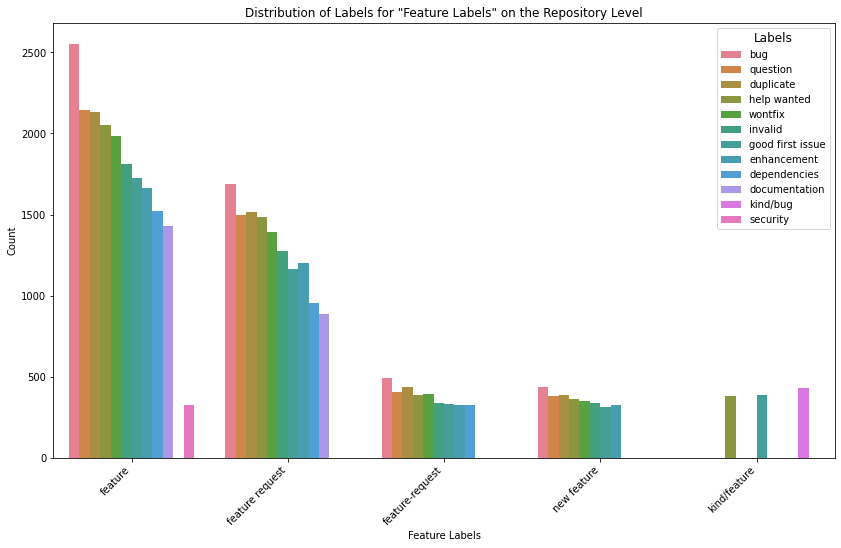

In [17]:
plt.figure(figsize=(14, 8))
sns.barplot(x='feature_labels', y='count', hue='labels', data=label_counts_summary_sorted)
plt.xlabel('Feature Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels for "Feature Labels" on the Repository Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Labels', title_fontsize='12')
plt.show()